# DIP Assignment 1

This notebook containts the solution of first dip assignment ** Intensity Transforms and Histogram Processing Assignment **

### Importing all the dependencies 

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
%matplotlib inline

# Question 1

Create a function domColors(im, k) takes an image im and an integer k and returns a list of k most frequently occurring colors

**Solution: Using KMeans clustering we will detect k centroids in the RGB space of the image. Being centroids they will represent the average values of the cluster and hence the most frequent values**  

In [2]:
# Input:: im = PIL image, k = int
# Output:: k centroids of the clusters

def KmeansClustering(im,k):

    # Resize image to 400x400 and convert to numpy array
    im = im.resize((400,400),Image.ANTIALIAS)
    im = np.array(im)
    
    # Get size of the image
    h,w = 400,400
    try:
        ch = np.shape(im)[2]
    except IndexError:
        ch = 1
    
    #   Flatten the image to 1600,ch vector
    im = im.reshape((w*h,ch))
    #     Perform Kmeans using sklearn library
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(im)

    return kmeans.cluster_centers_.astype('uint8')


In [3]:
# Solution to question 1
# Input:: im = PIL Image, k = int
# Output:: colors = k frequent colors, 
# Output:: image with frequent colors in the appended below

def domColors(im,k):

    # Get the frequent colors using Kmeans
    colors = KmeansClustering(im,k)
    im = np.array(im)

#     Display new image with k frequent colors colors
    try:
        h,w,c = im.shape
    except ValueError:
        h,w = im.shape
        c = 1
        im = im.reshape((h,w,c))

    ch = h//10
    cw = w//k
    
    new_img = np.empty((h+ch,w,3))
    new_img[0:h , 0:w, :] = im
    
#     Append colors at the bottom
    for i,color in enumerate(colors):
        new_img[h:h+ch,cw*i:cw*(i+1),:] = color[:]

    new_img = new_img.astype('uint8')
    plt.imshow(new_img)
    plt.axis('off')
    plt.title("Dominant Colors in the image")
    plt.show()

    return colors

### Run the function on RGB and Grayscale images

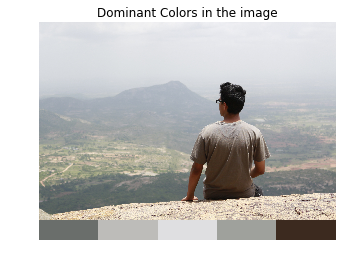

array([[106, 110, 107],
       [189, 188, 185],
       [223, 223, 225],
       [159, 161, 156],
       [ 60,  42,  31]], dtype=uint8)

In [4]:
# RGB Image
im = Image.open('./input_data/test_color_image.jpg')
domColors(im,5)

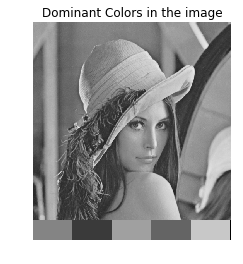

array([[132],
       [ 58],
       [160],
       [100],
       [200]], dtype=uint8)

In [5]:
# Grayscale Image
im = Image.open('./input_data/lena.bmp').convert('L')
domColors(im,5)

**Why do we need this function?** 
    It is always required that we know the most frequent colors in an image 

# Question 2 (chroma keying)

**Solution: Chrome Keying requires foreground image to be placed in a background image, this can be done by replacing pixels with the keycolor in foreground image with background image**

In [6]:
# Input:: fg = foreground image(PIL Image), bg = background image(PIL Image), chr_color = replacing color
# Output:: PIL Image
def ChromaKey(fg, bg, chr_color):
    # Get the dimensions of background image 
    bw, bh = bg.size
    # Make sure both images have the same dimension     
    fg = fg.resize((bw,bh), Image.ANTIALIAS)
    # Convert to numpy arrays     
    bg = np.array(bg)
    fg = np.array(fg)
    
    new_im = np.copy(fg)
    # Do the operation     
    new_im[fg == np.array(chr_color)] = bg[fg == np.array(chr_color)] 
    
    # Show the new image
    fig = plt.figure(figsize=(18, 16))
    ax1 = fig.add_subplot(3,1,1)
    ax1.imshow(fg)
    ax1.axis('off')
    ax1.set_title("Foreground")
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.imshow(bg)
    ax2.axis('off')
    ax2.set_title("Background")
        
    ax3 = fig.add_subplot(3,1,3)
    ax3.imshow(new_im)
    ax3.axis('off')
    ax3.set_title("Final Image")
    
    plt.show()
         
    return Image.fromarray(fg)

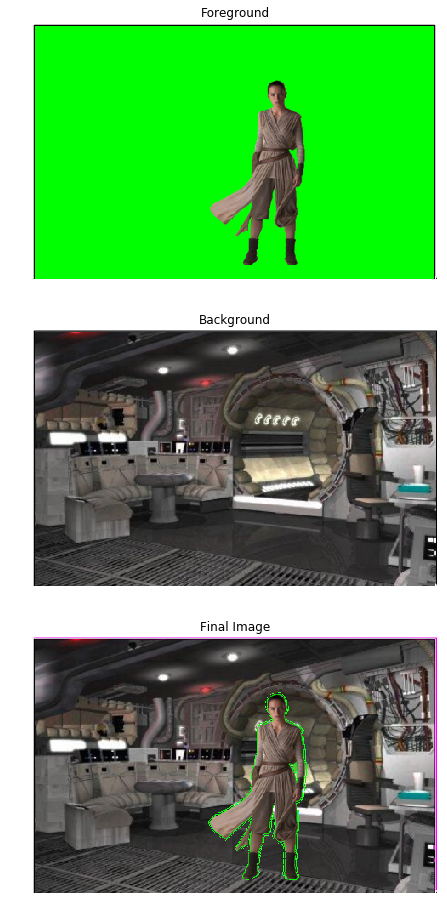

In [7]:
# Example 1
fg = Image.open('input_data/fg.png').convert('RGB')
bg = Image.open('input_data/bg.png').convert('RGB')
new_im = ChromaKey(fg,bg,[0,255,0])

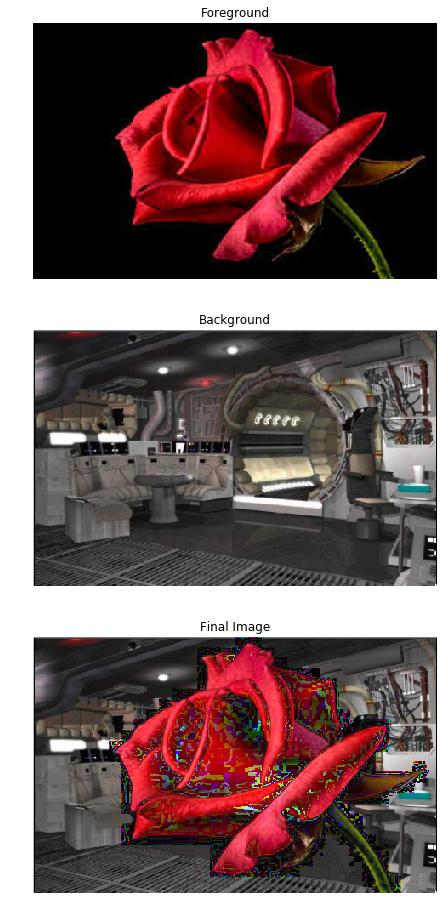

In [8]:
# Example 2
fg = Image.open('input_data/rose.jpeg').convert('RGB')
bg = Image.open('input_data/bg.png').convert('RGB')
new_im = ChromaKey(fg,bg,[0,0,0])

# Question 3

Peicewise Linear Transfrom given K1,K2, a, b

In [9]:
# Input k1=float k2=float a=float b=float
# Output new_im=linear transformed image
def LinearTransform(im, k1, k2, a, b):

    # Update input for use for main use
    k1 = k1
    k2 = int(k2*255)
    a = int(a*255)
    b = int(b*255)

    # Get the dimensions of background image 
    im = np.array(im)

    new_im = k1*im + k2
    new_im[im > b] = 255
    new_im[im < a] = 0
    new_im[new_im > 255] = 255
    new_im[new_im < 0] = 0
    
    return new_im.astype('uint8')

In [10]:
def display_linear_transform(im,k1,k2,a,b):
    
#   Just for displaying purposes
    x = np.arange(0,1,0.01)
    y = k1*x + k2
    y[ x < a] = 0
    y[ x > b] = 1
    y[ y > 1] = 1
    y[ y < 0] = 0

    new_im = LinearTransform(im,k1,k2,a,b)
    
#   Plot the graph, image
    fig = plt.figure(figsize=(16,16))
    ax1 = fig.add_subplot(1,3,2)
    ax2 = fig.add_subplot(1,3,3)
    ax3 = fig.add_subplot(1,3,1)
    ax1.imshow(im, cmap='gray')
    ax2.imshow(new_im, cmap='gray')
    ax3.plot(x,y)
    ax1.set_title('Old Image')
    ax2.set_title('Transformed Image')
    ax3.set_title('Function')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('scaled')
    plt.show()


# Question 3.2 

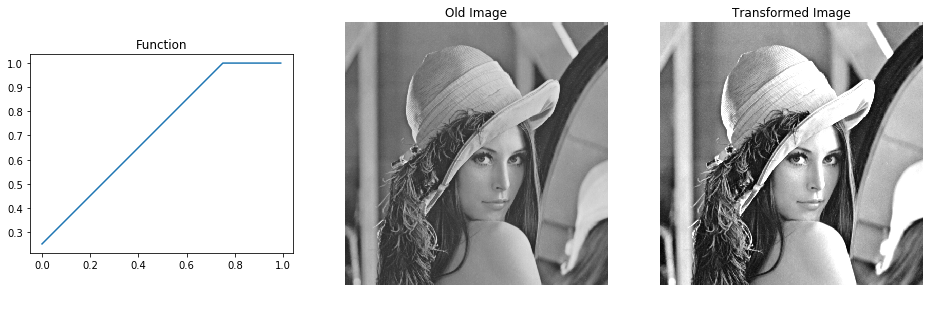

In [11]:
# Example 1
k1 = 1.0
k2 = 0.25
a = 0
b = 0.75
im = Image.open('input_data/lena.bmp').convert('L')
display_linear_transform(im,k1,k2,a,b)

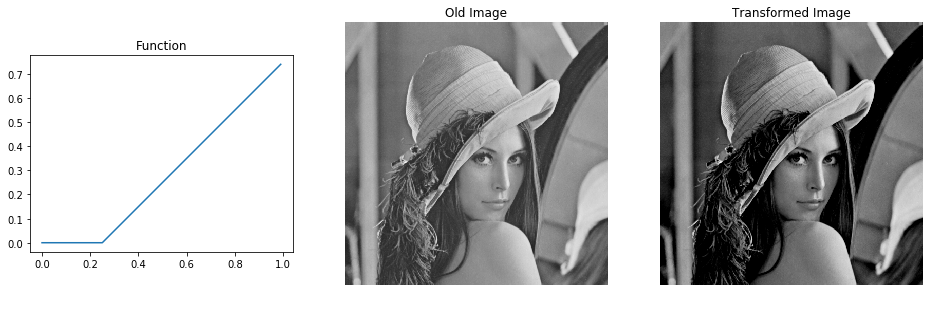

In [12]:
# Example 2
k1 = 1.0
k2 = -0.25
a = 0.25
b = 1.0
im = Image.open('input_data/lena.bmp').convert('L')
display_linear_transform(im,k1,k2,a,b)

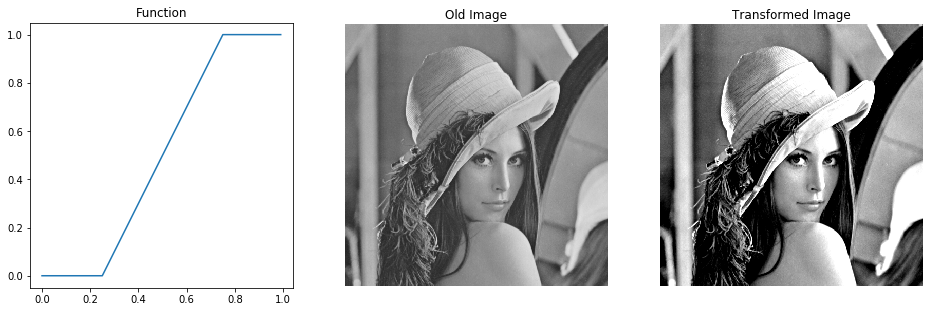

In [13]:
# Example 3
k1 = 2.0
k2 = -0.5
a = 0.25
b = 0.75
im = Image.open('input_data/lena.bmp').convert('L')
display_linear_transform(im,k1,k2,a,b)

In [14]:
def multiple_linear_transform(im,k1_list,k2_list,a_list, b_list):
    #   Just for displaying purposes
    x = np.arange(0,1,0.01)
    y_list = []
    im_list = []
    for i in range(len(k1_list)):
        try:
            new_y = k1_list[i]*x + k2_list[i]
            new_y[ x < a_list[i]] = 0
            new_y[ x > b_list[i]] = 1
            
            new_im = LinearTransform(im,k1_list[i],k2_list[i],a_list[i],b_list[i])
            
            y_list.append(new_y)
            im_list.append(new_im)
            
        except Exception as e:
            print("Error while producing linear transform:",e)
    
    im_list = np.array(im_list)
    new_im = np.sum(im_list,axis=0)
    new_im[ new_im > 255] = 255
    new_im[ new_im < 0] = 0
    
    
    y_list = np.array(y_list)
    y = np.sum(y_list,axis=0)
    y[ y > 1] = 1
    y[ y < 0] = 0
    
    
#   Plot the graph, image
    fig = plt.figure(figsize=(16,16))
    ax1 = fig.add_subplot(1,3,2)
    ax2 = fig.add_subplot(1,3,3)
    ax3 = fig.add_subplot(1,3,1)
    ax1.imshow(im, cmap='gray')
    ax2.imshow(new_im, cmap='gray')
    ax3.plot(x,y)
    ax1.set_title('Old Image')
    ax2.set_title('Transformed Image')
    ax3.set_title('Function')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('scaled')
    plt.show()


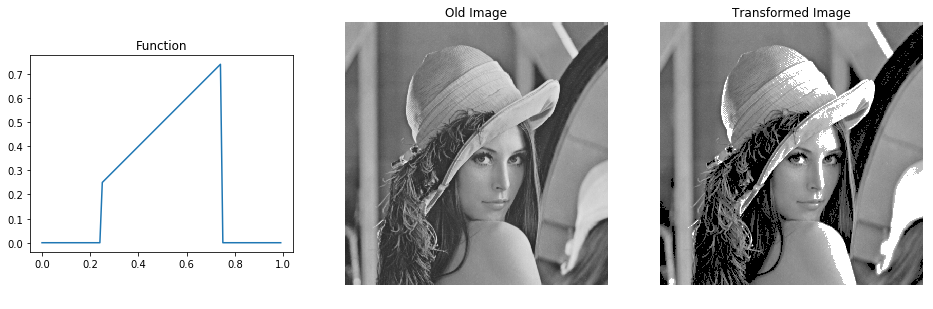

In [15]:
# Example 4
k1 = [1.0,0.0]
k2 = [0.0,-1.0]
a = [0.25,0.75]
b = [0.75,1.0]
im = Image.open('input_data/lena.bmp').convert('L')
multiple_linear_transform(im,k1,k2,a,b)

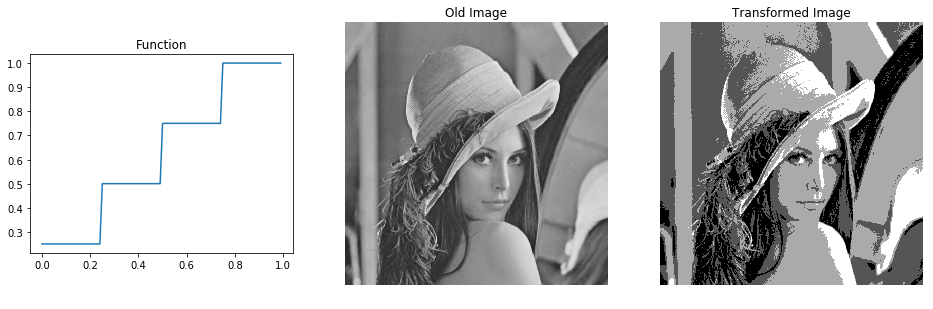

In [16]:
# Example 5
k1 = [0.0,0.0,0.0,0.0]
k2 = [0.25,0.25,0.25,0.25]
a = [0.0,0.25,0.5,0.75]
b = [1.0,1.0,1.0,1.0]
im = Image.open('input_data/lena.bmp').convert('L')
multiple_linear_transform(im,k1,k2,a,b)

# Question 4

- Plot Histogram
- Check size of histogram size for differenent image size

**Solution use bucket sort for each pixel value and plot each value**

In [17]:
# Bucket sort for images
def bucket_sort(im_list):
	buckets = np.zeros((256))
	for x in im_list:
		buckets[x] += 1
	return buckets

In [18]:
def histogram(im, verbose=True):

	im = np.array(im)
	try:
		w,h,ch = im.shape
	except ValueError:
		w,h = im.shape
		ch = 1
		im = im.reshape((w,h,1))

	hist_list = []
	plot_colors = ['red' , 'green', 'blue']
	for c in range(ch):
		y = bucket_sort(np.reshape(im[:,:,c],(w*h,1)) )	
		y = y/(w*h)
		hist_list.append(y)
		if verbose:
			plt.plot(np.arange(0,256,1), y , color=plot_colors[c])
			plt.fill_between(np.arange(0,256,1),y,0, alpha=0.3 , color=plot_colors[c])


	if verbose:
		plt.show()

	return np.array(hist_list)

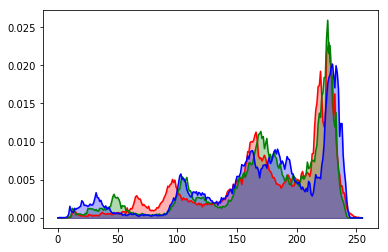

In [19]:
# Color Image Histogram
im = Image.open('input_data/test_color_image.jpg')
im = im.resize((256,256), Image.ANTIALIAS)
hist = histogram(im)

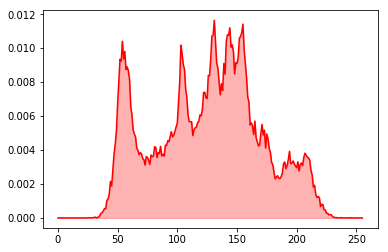

In [20]:
# B&W Image Histogram
im = Image.open('input_data/lena.bmp')
im = im.resize((256,256), Image.ANTIALIAS)
hist = histogram(im)

# Histrogram at different resolution

In [21]:
im = Image.open('input_data/lena.bmp')

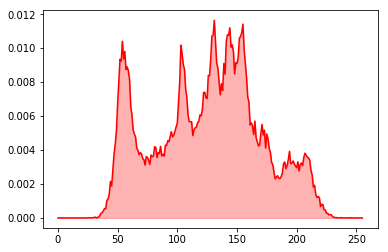

In [22]:
# 256x256
im = im.resize((256,256), Image.ANTIALIAS)
hist = histogram(im)

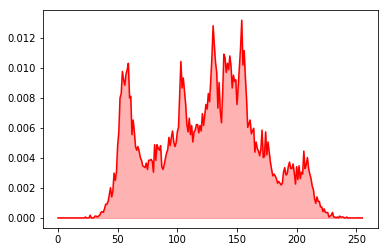

In [23]:
# 128x128
im = im.resize((128,128), Image.ANTIALIAS)
hist = histogram(im)

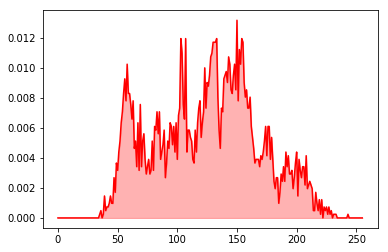

In [24]:
# 64x64
im = im.resize((64,64), Image.ANTIALIAS)
hist = histogram(im)

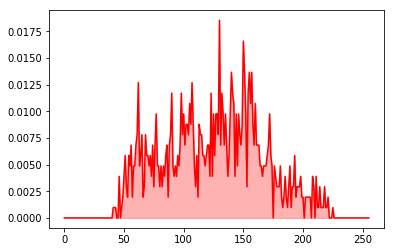

In [25]:
# 32x32
im = im.resize((32,32), Image.ANTIALIAS)
hist = histogram(im)

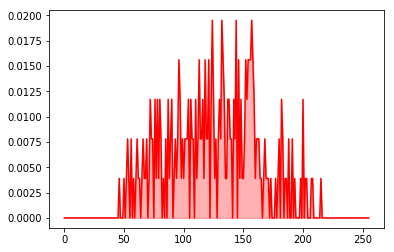

In [26]:
# 16x16
im = im.resize((16,16), Image.ANTIALIAS)
hist = histogram(im)

**Observation: with less pixels we see a reduction in precision**

# Question 5(Histogram Functions)

## 1. Histogram Equalization

In [27]:
def histogram_equalization(im,verbose=True):

	new_im = np.zeros_like(im)
	try:
		h,w,ch = im.shape
	except ValueError:
		h,w = im.shape
		ch =1

	hist = histogram(im,verbose=False)[0]
	cum_hist = np.cumsum(hist)
	for j in range(h):
		for i in range(w):
			new_im[j,i] = cum_hist[im[j,i]]*255 

	if verbose:
		fig = plt.figure(figsize=(14,8))
		ax11 = fig.add_subplot(2,3,1)
		ax12 = fig.add_subplot(2,3,2)
		ax13 = fig.add_subplot(2,3,3)
		ax21 = fig.add_subplot(2,3,4)
		ax22 = fig.add_subplot(2,3,5)
		ax23 = fig.add_subplot(2,3,6)

		ax11.plot(np.arange(0,256,1),hist)
		ax11.set_title("Prob Distribuition")
		ax12.plot(np.arange(0,256,1),cum_hist)
		ax12.set_title("Cumalative Prob Distribuition")
		ax13.imshow(im, cmap='gray')
		ax13.set_title("After")
		ax13.axis('off')

		new_hist = histogram(new_im,verbose=False)[0]
		new_cum_hist = np.cumsum(new_hist)

		ax21.plot(np.arange(0,256,1),new_hist)
		ax21.set_title("New Prob Distribuition")
		ax22.plot(np.arange(0,256,1),new_cum_hist)
		ax22.set_title("New CDF")
		ax23.imshow(new_im, cmap='gray')
		ax23.set_title("After")
		ax23.axis('off')

		plt.show()

	return new_im


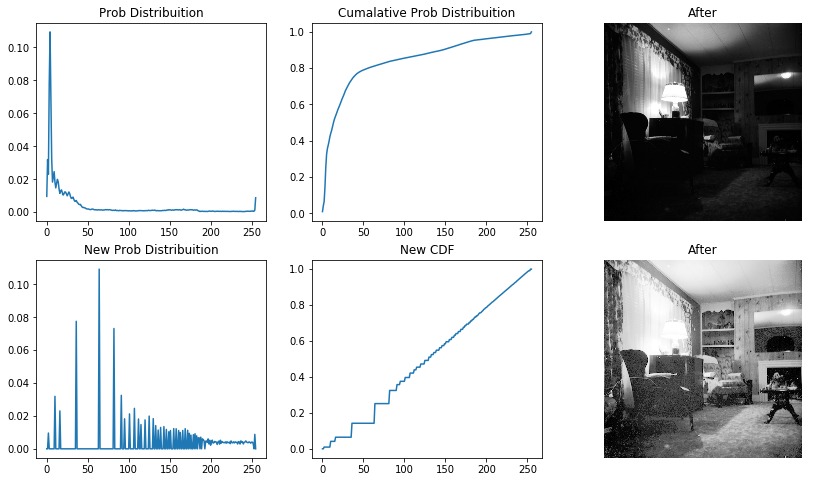

In [28]:
# Example 1
im = Image.open('input_data/hist_equal.jpg').convert('L')
im = im.resize((400,400), Image.ANTIALIAS)
im = np.array(im)
new_im = histogram_equalization(im)

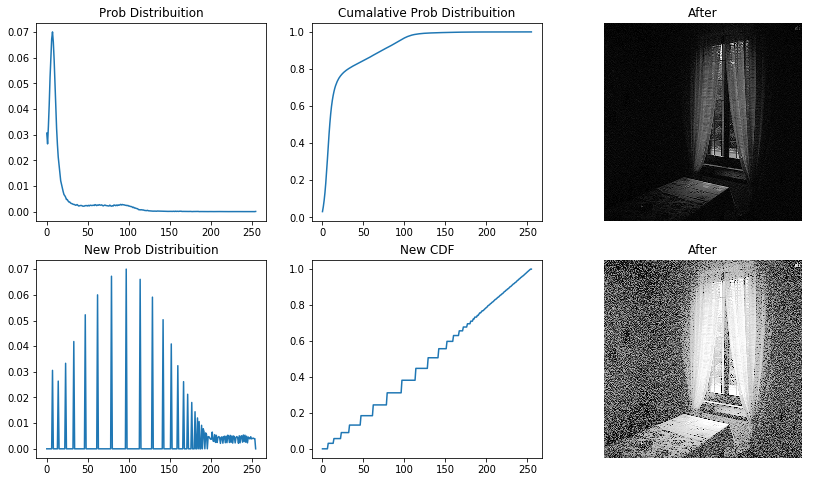

In [29]:
# Example 2
im = Image.open('input_data/hist_equal2.jpg').convert('L')
im = im.resize((400,400), Image.ANTIALIAS)
im = np.array(im)
new_im = histogram_equalization(im)

In [30]:
def local_histogram_equalization(im, k=5, verbose=True):
	new_im = np.zeros_like(im)

	try:
		h,w,ch = im.shape
	except ValueError:
		h,w = im.shape
		ch =1

	im = np.pad(im,k//2,'constant',constant_values=0)	
	for j in range(k//2,h-k//2):
		for i in range(k//2,w-k//2):
			new_im[j,i] = histogram_equalization(im[j-k//2:j+k//2 , i-k//2:i+k//2],verbose=False)[k//2,k//2]

	if verbose:
		fig = plt.figure(figsize=(14,8))
		ax11 = fig.add_subplot(2,3,1)
		ax12 = fig.add_subplot(2,3,2)
		ax13 = fig.add_subplot(2,3,3)
		ax21 = fig.add_subplot(2,3,4)
		ax22 = fig.add_subplot(2,3,5)
		ax23 = fig.add_subplot(2,3,6)

		hist = histogram(im,verbose=False)[0]
		cum_hist = np.cumsum(hist)

		ax11.plot(np.arange(0,256,1),hist)
		ax11.set_title("Prob Distribuition")
		ax12.plot(np.arange(0,256,1),cum_hist)
		ax12.set_title("Cumalative Prob Distribuition")
		ax13.imshow(im, cmap='gray')
		ax13.set_title("After")
		ax13.axis('off')

		new_hist = histogram(new_im,verbose=False)[0]
		new_cum_hist = np.cumsum(new_hist)

		ax21.plot(np.arange(0,256,1),new_hist)
		ax21.set_title("New Prob Distribuition")
		ax22.plot(np.arange(0,256,1),new_cum_hist)
		ax22.set_title("New CDF")
		ax23.imshow(new_im, cmap='gray')
		ax23.set_title("After")
		ax23.axis('off')

		plt.show()

	return new_im

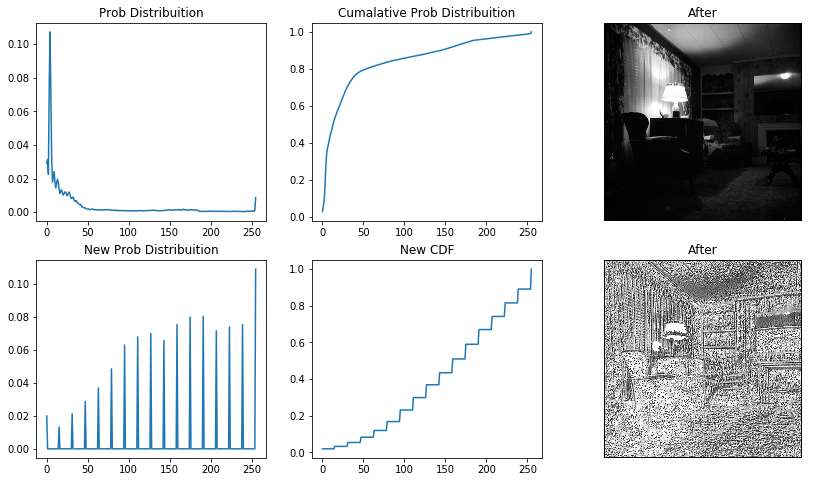

In [31]:
# Example 1
im = Image.open('input_data/hist_equal.jpg').convert('L')
im = im.resize((400,400), Image.ANTIALIAS)
im = np.array(im)
new_im = local_histogram_equalization(im)

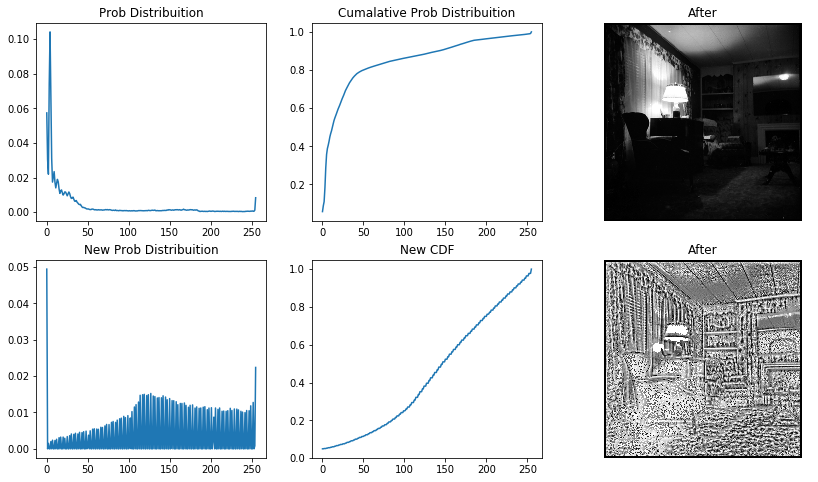

In [32]:
# Example 2
im = Image.open('input_data/hist_equal.jpg').convert('L')
im = im.resize((400,400), Image.ANTIALIAS)
im = np.array(im)
new_im = local_histogram_equalization(im,k=10)

In [33]:
def histogram_matching(im1,im2, verbose=True):
	try:
		h,w,ch = im1.shape
	except ValueError:
		h,w = im1.shape
		ch =1

	hist1 = histogram(im1,verbose=False)[0]
	cum_hist1 = np.cumsum(hist1)
	hist2 = histogram(im2,verbose=False)[0]
	cum_hist2 = np.cumsum(hist2)
    
	new_im = np.array(im1)
    
	for i in range(256):
		diff = abs(cum_hist1[i] - cum_hist2)
		ind = np.argmin(diff)
		new_im[new_im == i] = ind
    
	if verbose:
		fig = plt.figure(figsize=(8,14))
		ax11 = fig.add_subplot(3,2,1)
		ax12 = fig.add_subplot(3,2,2)
		ax21 = fig.add_subplot(3,2,3)
		ax22 = fig.add_subplot(3,2,4)
		ax31 = fig.add_subplot(3,2,5)
		ax32 = fig.add_subplot(3,2,6)

		ax11.plot(np.arange(0,256,1),cum_hist1)
		ax11.set_title("Original CDF")
		ax12.imshow(im1, cmap='gray')
		ax12.set_title("Original")
		ax12.axis('off')

		ax21.plot(np.arange(0,256,1),cum_hist2)
		ax21.set_title("Desired CDF")
		ax22.imshow(im2, cmap='gray')
		ax22.set_title("Second Image")
		ax22.axis('off')


		new_hist = histogram(new_im,verbose=False)[0]
		new_cum_hist = np.cumsum(new_hist)
	
		ax31.plot(np.arange(0,256,1),new_cum_hist)
		ax31.set_title("New CDF")
		ax32.imshow(new_im, cmap='gray')
		ax32.set_title("New Image")
		ax32.axis('off')

			

		plt.show()

	return Image.fromarray(new_im)

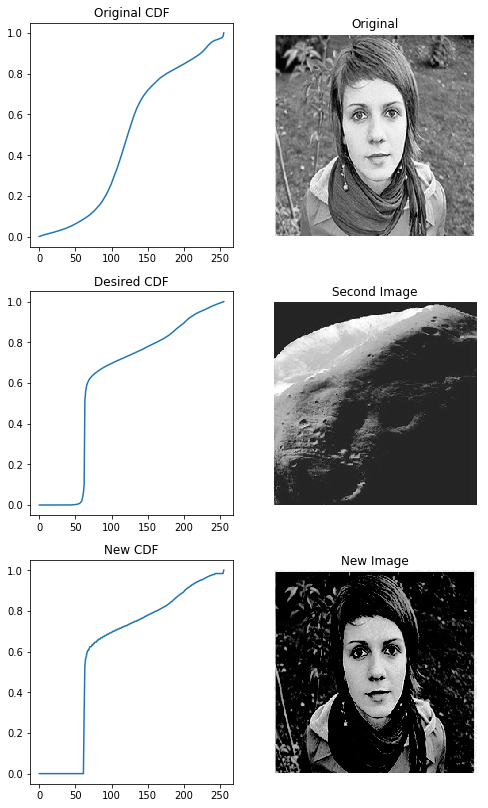

In [34]:
# Example 1
im1 = Image.open('input_data/hist-match-1.jpg').convert('L')
im1 = im1.resize((256,256), Image.ANTIALIAS)
im1 = np.array(im1)

im2 = Image.open('input_data/hist-match-2.jpg').convert('L')
im2 = im2.resize((256,256), Image.ANTIALIAS)
im2 = np.array(im2)

new_im = histogram_matching(im1,im2)

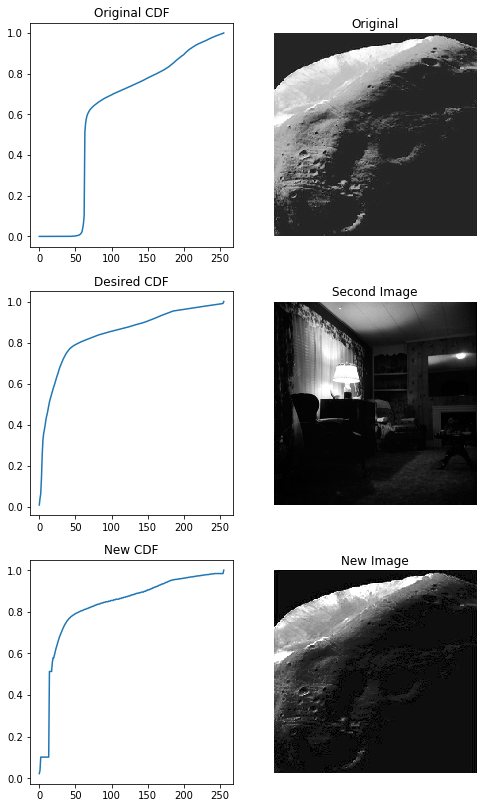

In [35]:
# Example 2
new_im = histogram_matching(im2,im)

# Question 6(Change to k-bit)

### 6.2 for 8 bit image k will go from 1->8, for n bit image it will go from 1->(n-1) 

In [36]:
def BitQuantizeImage(fg,k):
	im = np.array(fg)
	im = im/256
	im = np.floor(im*(2**k)).astype('uint8')

	return im

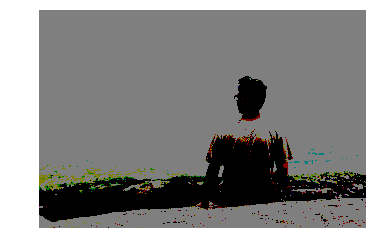

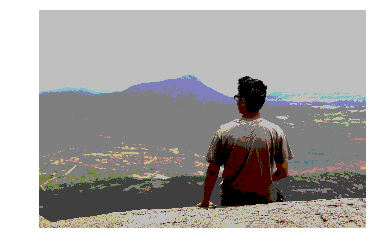

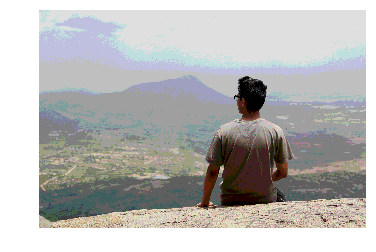

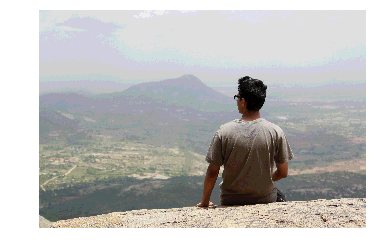

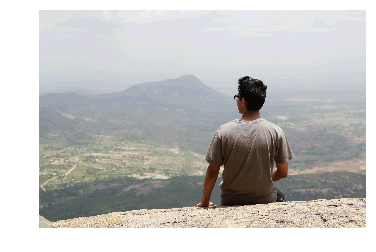

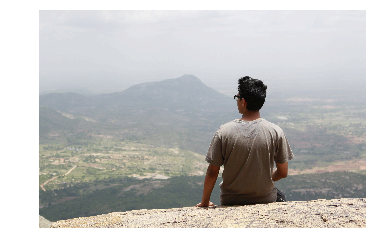

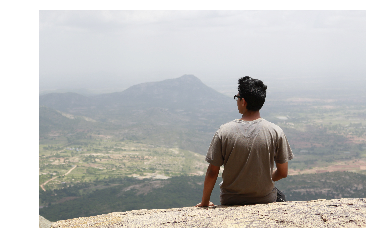

In [37]:
im = Image.open('input_data/test_color_image.jpg')
def display_different_k(im):
    for i in range(1,8):
        new_im = BitQuantizeImage(im,i)
        plt.imshow(new_im/(2**i))
        plt.axis('off')
        plt.show()
display_different_k(im)

# Question 7 (High and Low Contrast Images)

In [38]:
def high_and_low_contrast(im):

	im = np.array(im)
	im1 = im[:,0:im.shape[1]//2]
	im2 = im[:,im.shape[1]//2+1:im.shape[1]]
	# Run the function
	hist1 = histogram(im1,verbose=False)[0]
	hist2 = histogram(im2,verbose=False)[0]

	fig = plt.figure(figsize=(16,8))
	ax11 = fig.add_subplot(2,2,1)
	ax12 = fig.add_subplot(2,2,2)
	ax21 = fig.add_subplot(2,2,3)
	ax22 = fig.add_subplot(2,2,4)

	ax11.plot(np.arange(0,256,1),hist1)
	ax11.set_title("Histogram Low Contrast")
	ax12.imshow(im1, cmap='gray')
	ax12.set_title("Low Contrast")
	ax12.axis('off')

	ax21.plot(np.arange(0,256,1),hist2)
	ax21.set_title("Histogram High Contrast")
	ax22.imshow(im2, cmap='gray')
	ax22.set_title("High Contrast")
	ax22.axis('off')

	plt.show()

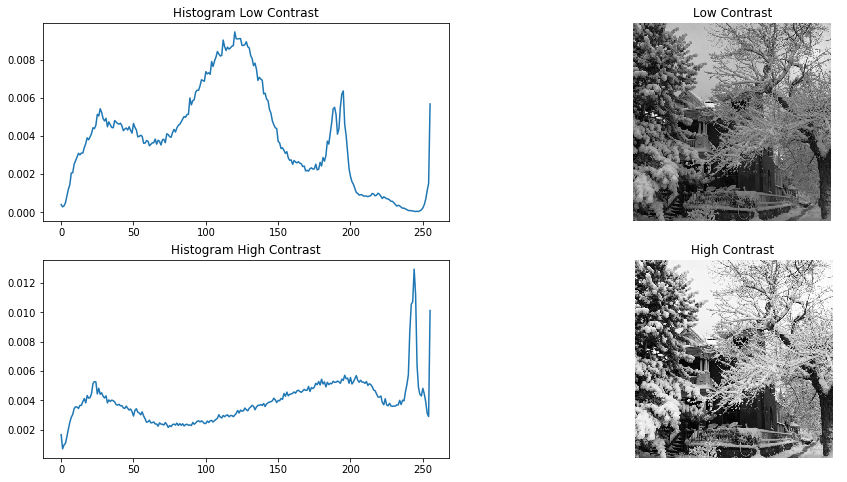

In [39]:
# Example 1
im = Image.open('input_data/contrast1.jpg')
high_and_low_contrast(im)

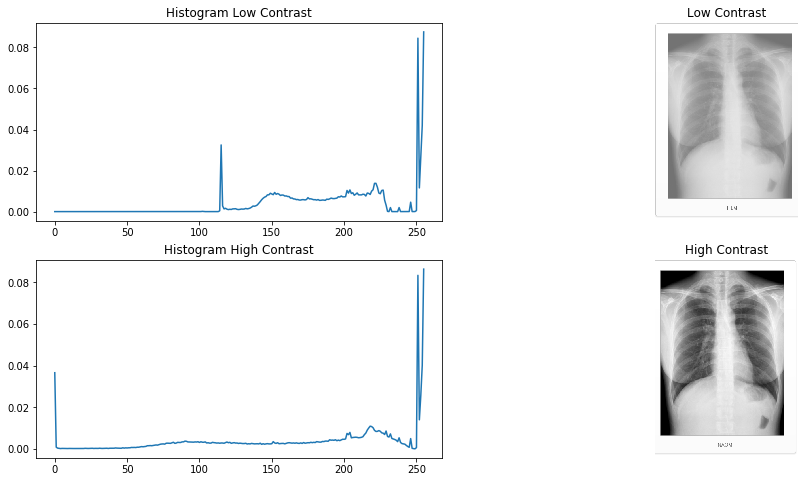

In [40]:
# Example 1
im = Image.open('input_data/contrast2.jpg')
high_and_low_contrast(im)

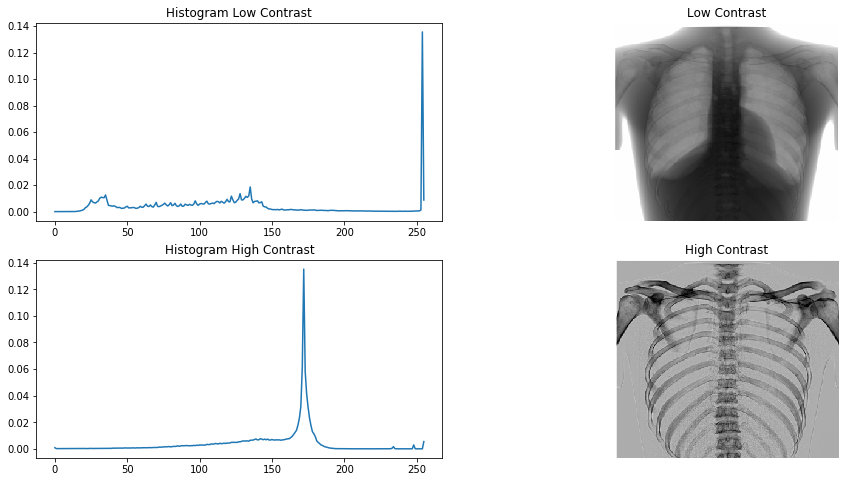

In [41]:
# Example 3
im = Image.open('input_data/contrast3.png')
high_and_low_contrast(im)

# Question 8

In [42]:
def BitQuantizeImage(fg):

	# Get the dimensions of background image 
	im = np.array(fg)

	fig = plt.figure()
	k = 128
	while k > 0:
		plt.imshow(255*(im//k))
		plt.axis('off')
		plt.show()
		im = im - k*(im//k)
		k = k//2

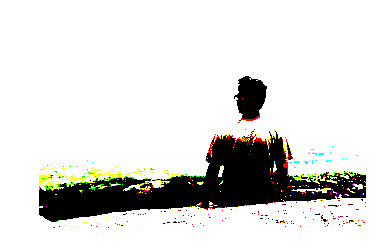

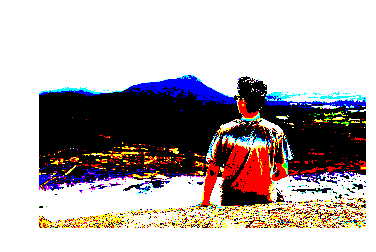

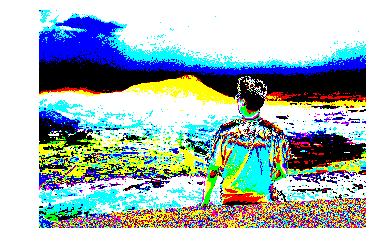

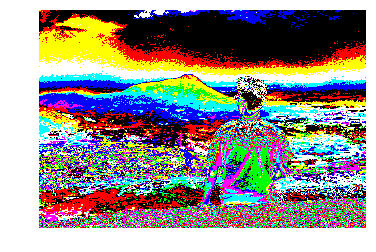

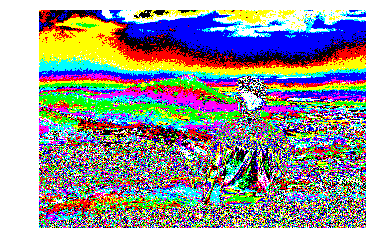

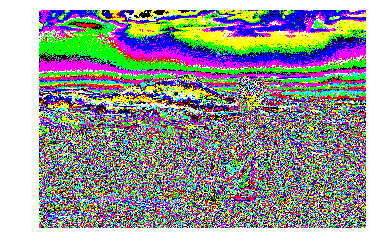

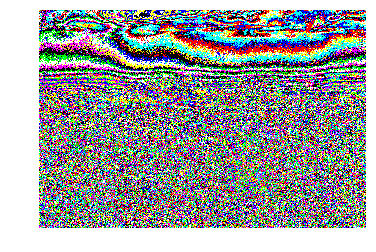

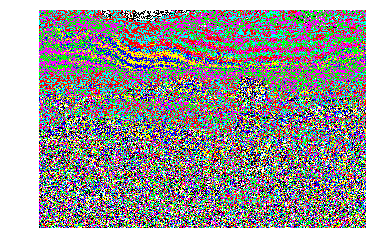

In [43]:
im = Image.open('input_data/test_color_image.jpg')
BitQuantizeImage(im)

# Question 9

In [44]:
import cv2 as cv

In [45]:
def BinarizeImage(type_t, img, block_size = 11, offset = 2):
    if type_t == "global":
        ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        return imgf
    elif type_t == "local":
        imgf = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,block_size, offset)
        return imgf

In [46]:
def GlobalThresholding(im,type_thres="global"):
    fig = plt.figure(figsize=(18,12))
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imgf= BinarizeImage(type_thres,gray)
        b, g, r = cv2.split(img)
        bf = BinarizeImage(type_thres,b)
        gf = BinarizeImage(type_thres,g)
        rf = BinarizeImage(type_thres,r)
        final = cv2.merge((bf,gf,rf))

        ax1 = fig.add_subplot(1,3,1)
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.axis('off')

        ax2 = fig.add_subplot(1,3,2)
        ax2.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
        ax2.axis('off')

        ax3 = fig.add_subplot(1,3,3)
        ax3.imshow(imgf, cmap = 'gray')
        ax3.axis('off')

    else:
        imgf= BinarizeImage(type_thres,gray)

        ax1 = fig.add_subplot(1,3,1)
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.axis('off')

        ax3 = fig.add_subplot(1,3,3)
        ax3.imshow(imgf, cmap = 'gray')
        ax3.axis('off')
    plt.show()

# Global Threshoding (OTSU's Method)

In [47]:
# Example 1
img = cv2.imread('input_data//palm-leaf-2.jpg')
GlobalThresholding(img)

NameError: name 'cv2' is not defined

In [ ]:
# Example 2
img = cv2.imread('input_data//palm-leaf-1.jpg')
GlobalThresholding(img)

# Local Adaptive Threshoding 


In [ ]:
# Example 1
img = cv2.imread('input_data//palm-leaf-2.jpg')
GlobalThresholding(img,type_thres="local")

In [ ]:
# Example 2
img = cv2.imread('input_data//palm-leaf-1.jpg')
GlobalLocalThresholding(img)